In [1]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py
import copy

In [2]:
#get data
f=h5py.File('EOB-M1.h5','r')
time=f['hPlus'][:,:,0]
signal=f['hPlus'][:,:,1]
ratio=f['MassRatio']

(0, 1.0, 10)
(0, 1.0, 15)
(0, 1.0, 20)
(0, 1.0, 25)
(0, 1.0, 30)
(0, 1.0, 35)
(0, 1.0, 40)
(0, 1.0, 45)
(0, 1.0, 50)


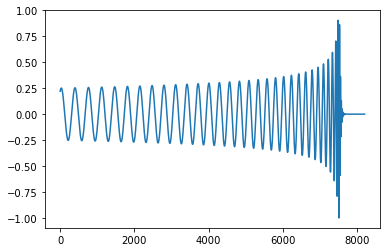

(0, 1.0, 55)
(0, 1.0, 60)
(0, 1.0, 65)
(0, 1.0, 70)
(0, 1.0, 75)
(0, 1.0, 80)
(0, 1.0, 85)
(0, 1.0, 90)
(0, 1.0, 95)
(0, 1.0, 100)
(0, 1.0, 105)
(1, 1.01, 10)
(1, 1.01, 15)
(1, 1.01, 20)
(1, 1.01, 25)
(1, 1.01, 30)
(1, 1.01, 35)
(1, 1.01, 40)
(1, 1.01, 45)
(1, 1.01, 50)


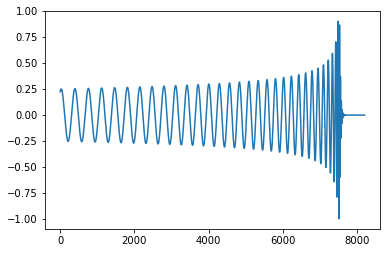

(1, 1.01, 55)
(1, 1.01, 60)
(1, 1.01, 65)
(1, 1.01, 70)
(1, 1.01, 75)
(1, 1.01, 80)
(1, 1.01, 85)
(1, 1.01, 90)
(1, 1.01, 95)
(1, 1.01, 100)
(1, 1.01, 105)
(2, 1.02, 10)
(2, 1.02, 15)
(2, 1.02, 20)
(2, 1.02, 25)
(2, 1.02, 30)
(2, 1.02, 35)
(2, 1.02, 40)
(2, 1.02, 45)
(2, 1.02, 50)


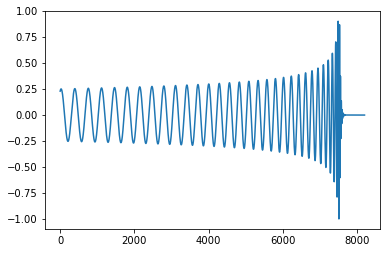

(2, 1.02, 55)
(2, 1.02, 60)
(2, 1.02, 65)
(2, 1.02, 70)
(2, 1.02, 75)
(2, 1.02, 80)
(2, 1.02, 85)
(2, 1.02, 90)
(2, 1.02, 95)
(2, 1.02, 100)
(2, 1.02, 105)
(3, 1.03, 10)
(3, 1.03, 15)
(3, 1.03, 20)
(3, 1.03, 25)
(3, 1.03, 30)
(3, 1.03, 35)
(3, 1.03, 40)
(3, 1.03, 45)
(3, 1.03, 50)


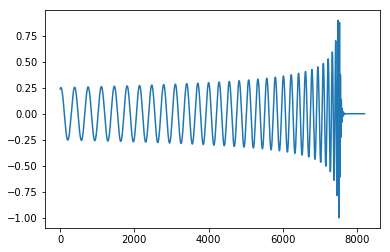

(3, 1.03, 55)
(3, 1.03, 60)
(3, 1.03, 65)
(3, 1.03, 70)
(3, 1.03, 75)
(3, 1.03, 80)
(3, 1.03, 85)
(3, 1.03, 90)
(3, 1.03, 95)
(3, 1.03, 100)
(3, 1.03, 105)
(4, 1.04, 10)
(4, 1.04, 15)
(4, 1.04, 20)
(4, 1.04, 25)
(4, 1.04, 30)
(4, 1.04, 35)
(4, 1.04, 40)
(4, 1.04, 45)
(4, 1.04, 50)


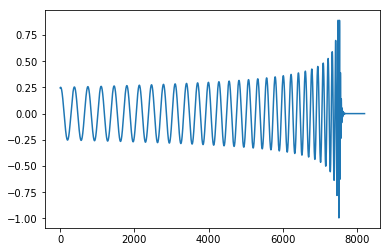

(4, 1.04, 55)
(4, 1.04, 60)
(4, 1.04, 65)
(4, 1.04, 70)
(4, 1.04, 75)
(4, 1.04, 80)
(4, 1.04, 85)
(4, 1.04, 90)
(4, 1.04, 95)
(4, 1.04, 100)
(4, 1.04, 105)


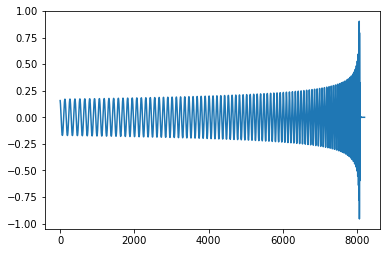

In [11]:
testsig=[]
trainsig=[]
for i in range(901):
    for totalmass in range(10,106,5):
        print(i,ratio[i],totalmass)
        fx=interpolate.interp1d(time[i]*totalmass,signal[i],kind='cubic')
        xnew=np.linspace(time[i][72228]*totalmass-1,time[i][72228]*totalmass,8192)
        if totalmass==50:
            plt.figure()
            plt.plot(fx(xnew))
            plt.show()
        if i%25==0:
            testsig.append(fx(xnew))
        else:
            trainsig.append(fx(xnew))
            

In [ ]:
g=h5py.File('dataset.h5','w')
g.create_dataset('test',data=testsig,dtype='f')
g.create_dataset('train',data=trainsig,dtype='f')
print(list(g.keys()))
g.close()

In [ ]:
g=h5py.File('dataset.h5','r')
print(g['test'].shape,g['train'].shape)


In [ ]:
test=np.array(g['test'])
temp=random.sample(test,5)
print(temp)